## CBE 162 Fall 2024 Lab 7 Time lag and Pade Approximation
## Problem 1

Consider a system where a pipe feeds a CSTR. The reactor has volume $V$ and no change in volume occurs with time. A tracer flows into the pipe (no reaction occurs in the reactor) with flow rate F and concentration $C_{a0} $. Since no reaction occurs in the pipe, the outlet concentration responds to a change in the inlet concentration with a pure dead time equal to $ \tau$

(Hint : Think about how long it takes for the change in concentration to reach the end of the pipe, if introduced at t=0)

Now, think about how a well mixed CSTR would respond to a change in the inlet concentration fed to it, provided no reaction occurs. If $C_{a0}$ is changed at t=0, derive a general expression relating the dynamic response of the CSTR outlet concentration $C_{a,out}$, to a change in the pipe inlet concentration.

In [1]:
F=25 # lit/min
V=1000 #lit
Ca0=1 #M
Caout=Ca0
tau=0.5*V/F


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step

1.1) A 5% increase in the pipe inlet concentration is made as a step change at t=0. Simulate the change in $C_{a,out}$ with time. Plot the dynamic behaviour of the CSTR outlet concentration till t=$7τ$.


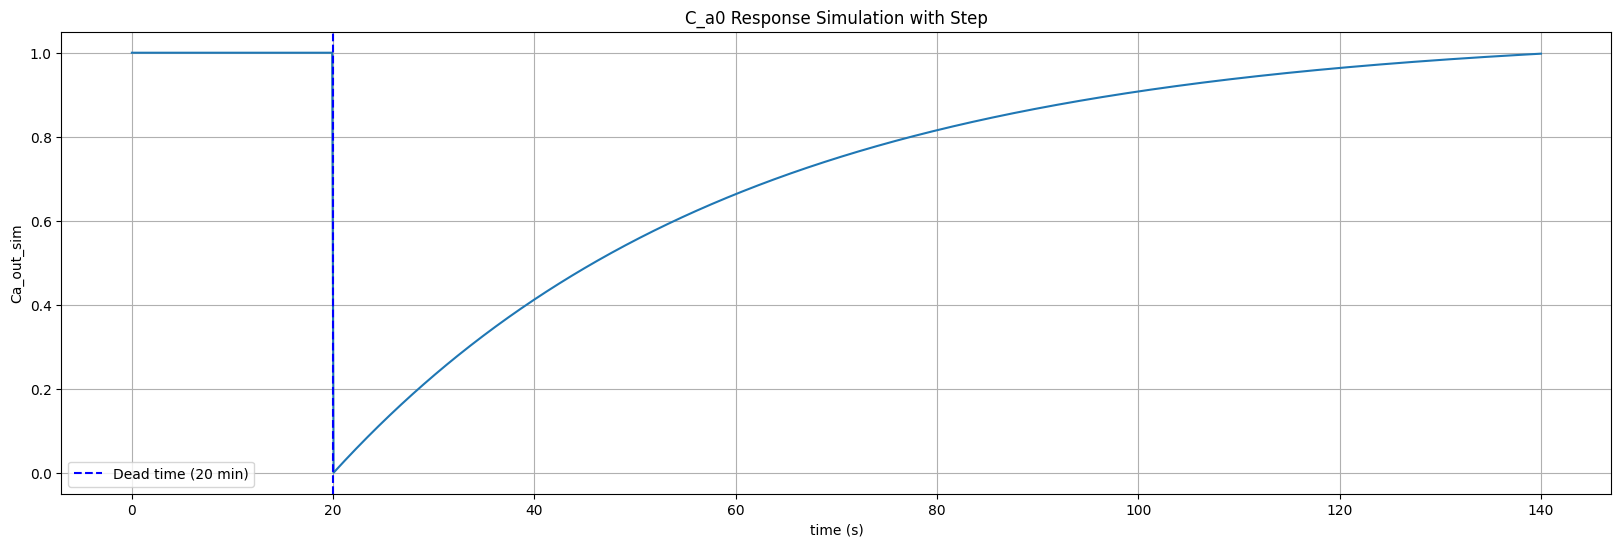

In [3]:
t = np.linspace(0, 7 * tau, 1000)
Ca0_step = 1.05 * Ca0

def Ca_out(t, tau, F, V, Ca0, Ca0_step):
    return np.piecewise(t, [t < tau, t >= tau],
                          [lambda t: Ca0, 
                           lambda t: Ca0_step * (1 - np.exp(-F / V * (t - tau)))])

Ca_out_sim = Ca_out(t, tau, F, V, Ca0, Ca0_step)
asymp = [20] * len(Ca_out_sim)

plt.figure(figsize=(20,6))
plt.plot(t, Ca_out_sim)
plt.title("C_a0 Response Simulation with Step")
plt.xlabel("time (s)")
plt.ylabel("Ca_out_sim")
plt.grid(True)

plt.axvline(tau, color = "b", linestyle="--", label="Dead time (20 min)")
plt.legend()



1.2) A 5% increase in inlet concentration is made as an impulse change at t=0. Simulate the change in $C_{a,out}$ with time. Plot the dynamic behaviour of the CSTR outlet concentration till t=$7τ$.


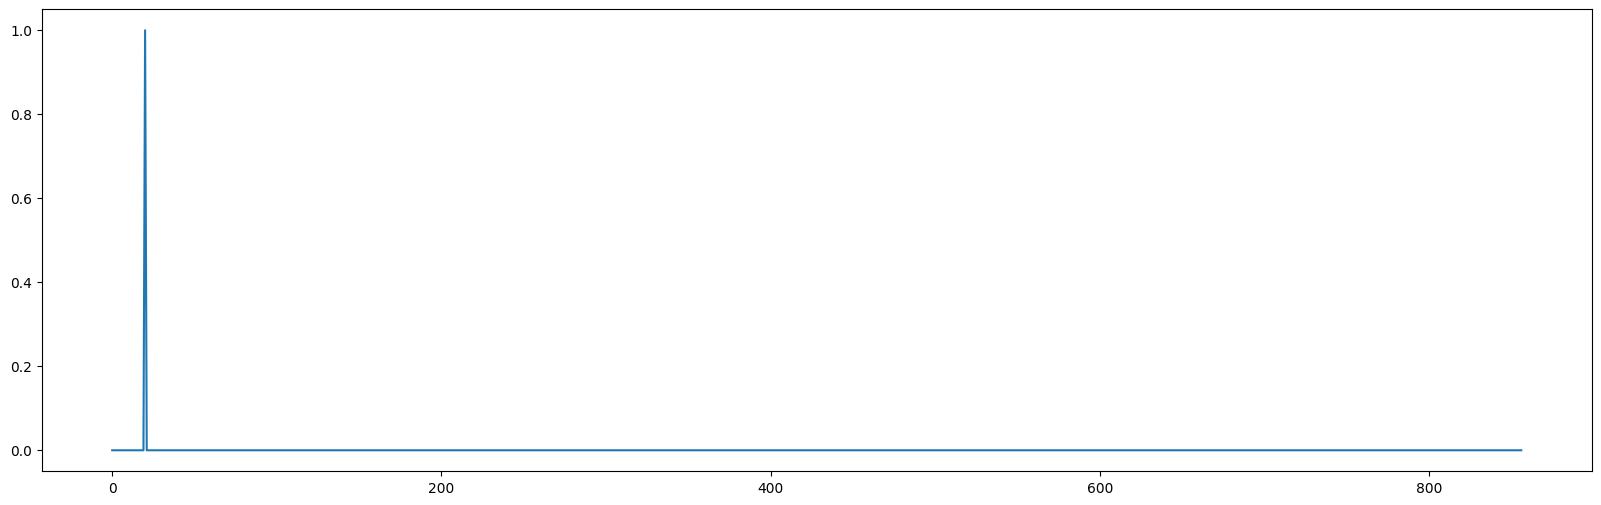

In [14]:
# first we need to construct an impulse
def dirac_delta(x, sample):
    return np.where(x == sample, 1, 0)

x = np.arange(0, 857, 1)
impulse = dirac_delta(x, 20)

plt.figure(figsize=(20,6))
plt.plot(x, impulse)
plt.show()


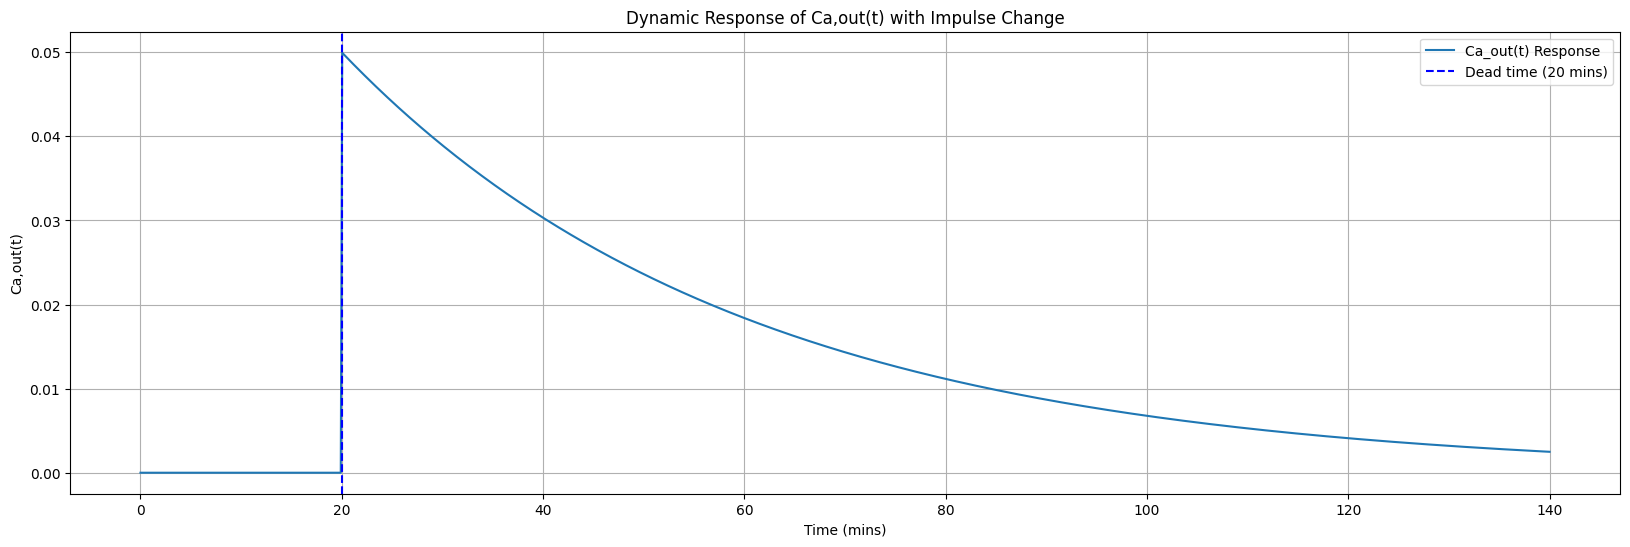

In [17]:

impulse = Ca0 * 0.05
t_sim = np.linspace(0, 7 * tau, 1000)
impulse_input = dirac_delta(t_sim, 20) * impulse

def Ca_out_impulse_response(t, tau, F, V, impulse_input):
    Ca_out = np.piecewise(t, [t < tau, t >= tau],
                          [lambda t: 0,
                           lambda t: impulse_input * (np.exp(-F / V * (t - tau)))])
    return Ca_out

Ca_out_impulse_sim = Ca_out_impulse_response(t_sim, tau, F, V, impulse)

plt.figure(figsize=(20, 6))
plt.plot(t_sim, Ca_out_impulse_sim, label="Ca_out(t) Response")
plt.axvline(tau, color="b", linestyle="--", label="Dead time (20 mins)")
plt.title("Dynamic Response of Ca,out(t) with Impulse Change")
plt.xlabel("Time (mins)")
plt.ylabel("Ca,out(t)")
plt.legend()
plt.grid(True)
plt.show()


## Approximations for Dead time

## Problem 2

Consider a case where the transfer function is:

$$ Y(s) = \frac{K e^{-s\tau} (\tau_2 s+1)}{\tau_1^2 s^2 + 2\zeta \tau_1 s + 1}U(s)$$



In [19]:
K = 2
tau = 10
zeta = 1
tau1 = 25
tau2= 12
zeta = 0.5



2.1) Make the first order Taylor series approximation for the dead time aspect of the transfer function. Now, for this transfer function, use the signal library to plot the dynamic response of the output for a unit step change in input. Simulate until 5 times the controlling time constant.

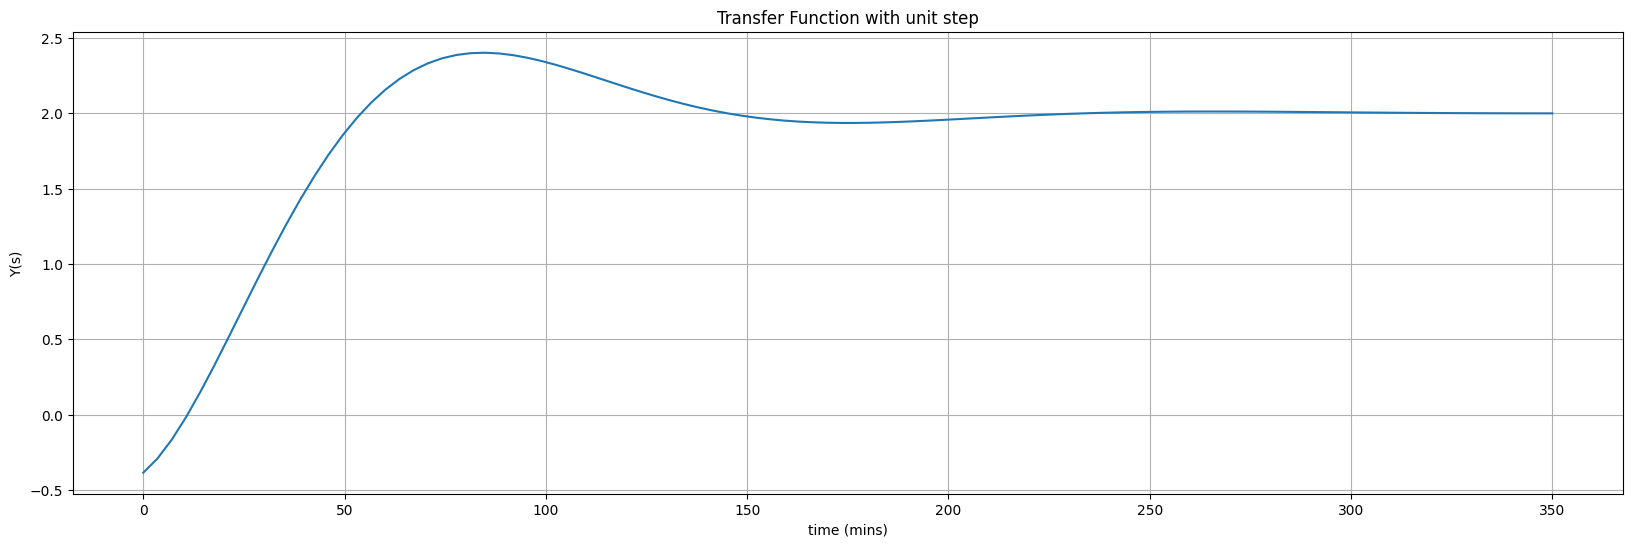

In [24]:
numerator = [K * (-tau * tau2), K * (-tau + tau2), K]
denominator = [tau1**2, 2 * zeta * tau1, 1]
transfer = TransferFunction(numerator, denominator)

t = np.linspace(0, 5*tau1, 1000)
t_out, y_out = step(system=transfer)

plt.figure(figsize=(20, 6))
plt.plot(t_out, y_out, label="Step Response")
plt.title("Transfer Function with unit step")
plt.xlabel("time (mins)")
plt.ylabel("Y(s)")
plt.grid(True)


2.2) Make the Pade approximation for the dead time aspect of the transfer function. Now, for this transfer function, use the signal library to plot the dynamic response of the output for a unit step change in input.Simulate until 5 times the controlling time constant.




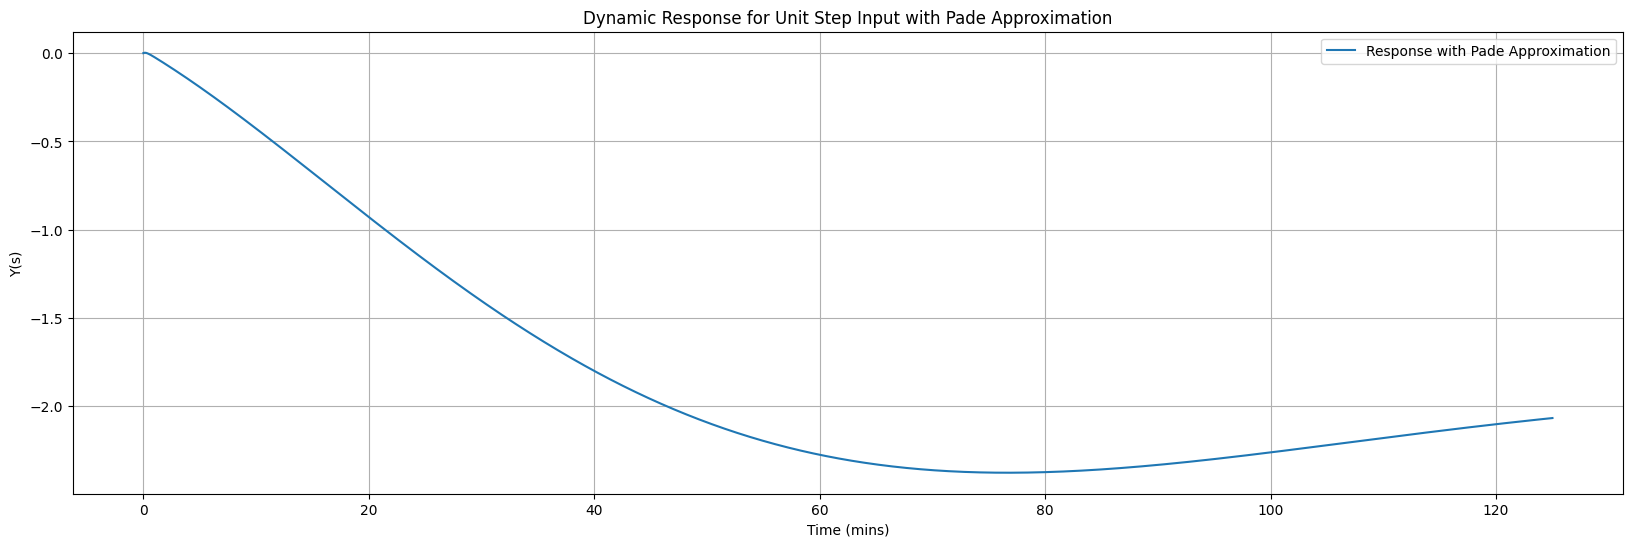

In [27]:
pade_numerator = [1, -tau/2]
pade_denominator = [1, tau/2]

numerator_original = [K * tau2, K]
denominator_original = [tau1**2, 2 * zeta * tau1, 1]

numerator_pade = np.polymul(numerator_original, pade_numerator)
denominator_pade = np.polymul(denominator_original, pade_denominator)

system_pade = TransferFunction(numerator_pade, denominator_pade)

t = np.linspace(0, 5 * tau1, 1000)
t_out_pade, y_out_pade = step(system_pade, T=t)

plt.figure(figsize=(20, 6))
plt.plot(t_out_pade, y_out_pade, label="Response with Pade Approximation")
plt.title("Dynamic Response for Unit Step Input with Pade Approximation")
plt.xlabel("Time (mins)")
plt.ylabel("Y(s)")
plt.grid(True)
plt.legend()
plt.show()


2.3) Separate the dead time aspect of the transfer function (by plotting against $t+\tau$ instead of $t$). Now for the remaining transfer function, use the signal library to plot the dynamic response until 5 times the controlling time constant, for a unit step change.

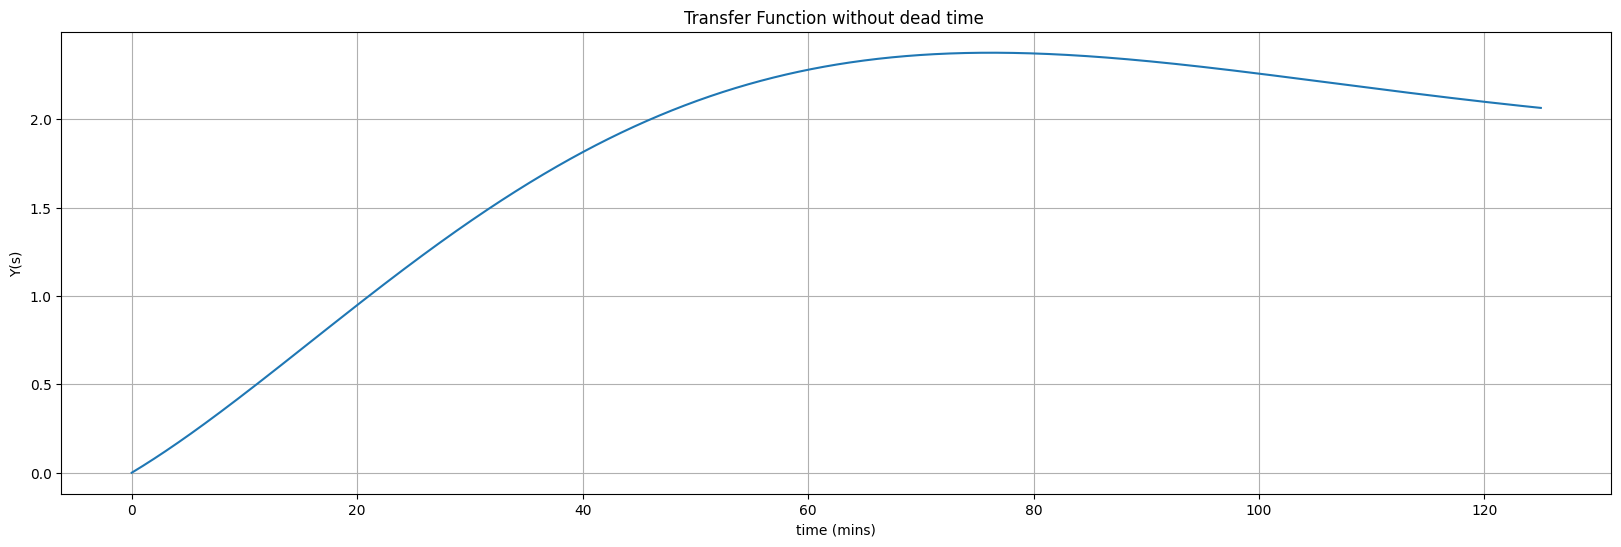

In [26]:
tau_dead_time = 10
numerator = [K * tau2, K]
denominator = [tau1**2, 2 * zeta * tau1, 1]

transfer = TransferFunction(numerator, denominator)

t = np.linspace(0, 5 * tau1, 1000)
t_shifted = t + tau_dead_time
t_out, y_out = step(transfer, T=t)

plt.figure(figsize=(20, 6))
plt.plot(t_out, y_out, label="Step Response")
plt.title("Transfer Function without dead time ")
plt.xlabel("time (mins)")
plt.ylabel("Y(s)")
plt.grid(True)

2.4) Use the result from 2.3 to verify your results from 2.2 and 2.1.  Which approximation is better? Write your answer as a comment in the code cell below.

#### The taylor expansion was more accurate as it showed an accurate exponential decay while the pade approximation shows the wrong relationship for the transfer function over time